# Data Log
### Prior research 
~~~
https://www.insurancefraud.org/statistics.htm

* States w/ highest fraud rates (according to the article): MA|FL|CA|MI|NY
* State we cover in the model: OK|NE|MO|IA|KA
~~~
### Dataset Observations
* Data contains only 5 states
* There is only 1 fire fraudulent claim
* Missing/Null Variables: Education|Location|Outstanding_Balance
* 14 Nominal variables | 7 Interval Variables
* Binary Target Variable will be Fraudulent_Claim
* ~5000 records

### Hypothesis
* Which states have the highest likelihood for auto insurance fraud to occur based on vehicle models and claim clause? Are there any correlations between the car details and location?

### Libraries Used
* Seaborn
* Statsmodel
* Pyplot

# Dataset Importation
* Usage of numpy and pandas allow us to easily utilize the csv file 
* Usage of sklearn w/ train_test_split and preprocessing to help us train our datasets and test them against another file
---
* Run a .sample to see if we imported data correctly.

In [268]:
import numpy as np
#Easily import csv files from a spreadsheet 
import pandas as pd
from sklearn.cross_validation import train_test_split
from sklearn import preprocessing

Test = pd.read_csv('claim_data_v2_train.csv')
Score = pd.read_csv('Claim_Score_Dataset.csv')
Test.sample(5)

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
1598,MO,Missouri,802.522936,College,12/1/2018,Unemployed,F,0,Rural,Single,...,20,26,Scratch/Dent,Branch,Two-Door Car,Luxury,Chevrolet,7767.0,N,1081
2390,MO,Missouri,1280.709083,College,12/15/2018,Unemployed,F,0,Suburban,Married,...,32,21,Collision,Agent,Four-Door Car,Compact,Honda,42383.0,N,3781
3884,KS,Kansas,3006.169259,High School or Below,12/15/2018,Employed,M,48258,Suburban,Married,...,12,86,Collision,Branch,Luxury Car,Midsize,Chevrolet,29922.0,N,3295
2789,IA,Iowa,1420.698091,College,1/15/2019,Disabled,F,26056,Suburban,Married,...,17,73,Collision,Branch,Four-Door Car,Midsize,Ford,20289.0,N,5264
1130,NE,Nebraska,645.126384,Bachelor,12/15/2018,Employed,F,30857,Urban,Married,...,17,14,Scratch/Dent,Web,Two-Door Car,Luxury,Toyota,36379.0,N,4793


# Encoding Part I
* By converting each column into numerical data via sklearn preprocessing, we can allow more complex algorithims to work with the data and help us gain more insight. For now, we have only coded Fraudulent_Claim so we may look at some visualizations later on. 
* When we test for accuracy, we will end up encoding all other variables.

In [269]:
from sklearn import preprocessing 
def encode_features(df_Test): 
    features = ['Fraudulent_Claim']
    for feature in features: 
        le = preprocessing.LabelEncoder() 
        le = le.fit(df_Test[feature]) 
        df_Test[feature] = le.transform(df_Test[feature]) 
    return df_Test

In [270]:
Test = encode_features(Test) 
Score = encode_features(Score)
Test.head()

,State_Code,State,Claim_Amount,Education,Claim_Date,Employment_Status,Gender,Income,Location,Marital_Status,...,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Outstanding_Balance,Fraudulent_Claim,Claimant__Number
0,NE,Nebraska,2412.750402,Bachelor,12/1/2018,Medical Leave,M,14072,Suburban,Divorced,...,13,3,Collision,Agent,Four-Door Car,Midsize,Ford,15105.0,1,1023
1,NE,Nebraska,550.413903,Bachelor,12/1/2018,Unemployed,F,0,Suburban,Married,...,18,45,Collision,Call Center,Four-Door Car,Midsize,Honda,10728.0,1,1231
2,MO,Missouri,531.889664,Bachelor,12/1/2018,Employed,M,25134,Suburban,Married,...,3,0,Hail,Call Center,Four-Door Car,Compact,Honda,17654.0,1,1310
3,IA,Iowa,471.976219,Bachelor,12/1/2018,Employed,M,37057,Rural,Married,...,5,48,Collision,Agent,Four-Door Car,Compact,Honda,28344.0,1,1311
4,IA,Iowa,245.357079,Bachelor,12/1/2018,Medical Leave,M,29735,Suburban,Single,...,3,92,Collision,Agent,Four-Door Car,Midsize,Chevrolet,17945.0,1,1364


# Defining Variables
* Defining df statements to contain certain range or criteria elements for chosen variables.

### Simplify Claimamount
* Chose to bin claim amounts into different ranges rising by 250 intervals and then by 1000 intervtals

In [271]:
def simplify_claimamount(df): 
    df.Claim_Amount = df.Claim_Amount.fillna(-0.5) 
    bins = (-1, 0, 250, 500, 750, 1000, 2000, 3000, 10000) 
    group_names = ['Uknown', 'Minor', 'Low', 'Moderate', 'Upper Moderate', 'High', 'Very High', 'Insane'] 
    categories = pd.cut(df.Claim_Amount, bins, labels=group_names) 
    df.Claim_Amount = categories 
    return df

# Justification for Binning Claim Amount
* We had tried testing Logistic Regression to see if there was any significance with interval variables. After testing each numerical variable against another, we determined there is no defined correlation between them. 

### Simple Scatterplot
* By testing Months Since Last Claim against Claim Amount, our goal was to see whether or not Claim Amount increased as the Months Since Last Claim grew...AKA do fraudulent people wait longer on higher-paying claims?

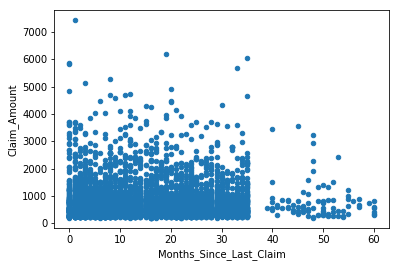

In [272]:
Test.plot(kind='scatter', x='Months_Since_Last_Claim', y='Claim_Amount')

### Logistic Regression Plot
* Using the same variables, Months Since Last Claim and Claim Amount, we wanted to test a line of best fit to see if there truly was a correlation between the two variables. By importing datasets and linear_model from sklearn (as well as matplotlib.pyplot) we were allowed to utilize X and Y axis to create our graphic. 
---
* X_train and Y_train output the line of best fit while X_test and Y_test output the scatterplot.
* We define 'regr' to create a linear regression, train it with test data, then plot the points

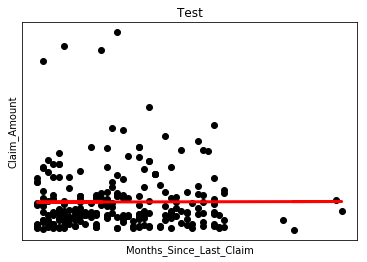

In [273]:
import matplotlib.pyplot as plt
from sklearn import datasets, linear_model


Y = Test['Claim_Amount']
X = Test['Months_Since_Last_Claim']
 
X=X.values.reshape(len(X),1)
Y=Y.values.reshape(len(Y),1)
 
# Split the data into training/testing sets
X_train = X[:-250]
X_test = X[-250:]
 
# Split the targets into training/testing sets
Y_train = Y[:-250]
Y_test = Y[-250:]
 
# Plot outputs
plt.scatter(X_test, Y_test,  color='black')
plt.title('Test')
plt.xlabel('Months_Since_Last_Claim')
plt.ylabel('Claim_Amount')
plt.xticks(())
plt.yticks(())

# Create linear regression object
regr = linear_model.LinearRegression()
 
# Train the model using the training sets
regr.fit(X_train, Y_train)
 
# Plot outputs
plt.plot(X_test, regr.predict(X_test), color='red',linewidth=3)

plt.show()

### Simplify Education
* We are imputing null values as missing values.

In [274]:
def simplify_education(df): 
    df.Education = df.Education.fillna('Missing') 
    return df

### Drop Variables
* We decided to remove these variables from the overall model.

In [275]:
def drop_features(df): 
      return df.drop(['Claim_Date', 'Employment_Status', 'Location', 'Education', 'Outstanding_Balance'], axis=1)

# Justification for Dropping Variables
* Claim Date doesn't really help us predict anything other than identifying when claims were made, not why
* Employment_Status, Education and Location proved to have insignificant P-values even when tested 
* Outstanding_Balance contained too many missing values for our liking

### Importing matplotlib, seaborn and statsmodels 

In [276]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf

%matplotlib inline

### P-Values and Basic Bar Plots
* By using statsmodels and seaborn, we can get a combination of P-value statistics and bar plots to visualize data. Below are a few graphs we found to be insignificant to predict Fraudulent Claims, hence, we removed them from the dataset due to their high P-values.

Intercept                             0.000616
Employment_Status[T.Employed]         0.968275
Employment_Status[T.Medical Leave]    0.732595
Employment_Status[T.Retired]          0.632905
Employment_Status[T.Unemployed]       0.223811
dtype: float64

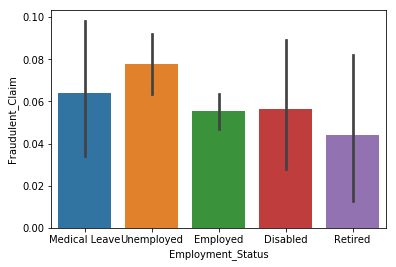

In [277]:
sns.barplot(x="Employment_Status", y="Fraudulent_Claim", data=Test);

lm = smf.ols('Fraudulent_Claim ~ Employment_Status', data=Test).fit()
lm.pvalues

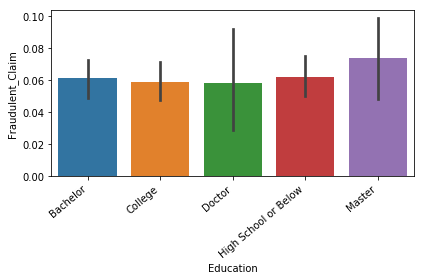

Intercept                            1.725148e-22
Education[T.College]                 8.157113e-01
Education[T.Doctor]                  8.636580e-01
Education[T.High School or Below]    9.207846e-01
Education[T.Master]                  3.626239e-01
dtype: float64

In [278]:
ax = sns.barplot(x="Education", y="Fraudulent_Claim", data=Test);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

lm = smf.ols('Fraudulent_Claim ~ Education', data=Test).fit()
lm.pvalues

# All insignificant

Intercept               4.434533e-10
Location[T.Suburban]    7.226087e-02
Location[T.Urban]       6.601812e-02
dtype: float64

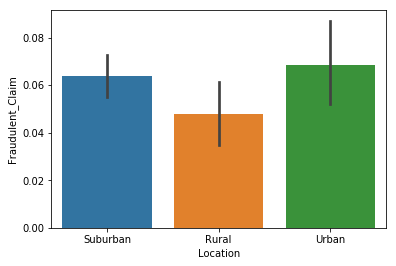

In [279]:
sns.barplot(x="Location", y="Fraudulent_Claim", data=Test);

lm = smf.ols('Fraudulent_Claim ~ Location', data=Test).fit()
lm.pvalues

# All insignificant

* Below is a combination of Fraudulent Claim and Location/Education. We tried to see whether or not Location played a significant role in differentiating Education...and we deduced that these values weren't significant enough.

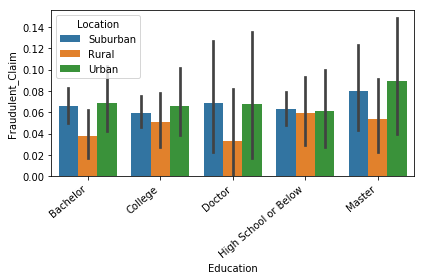

In [280]:
ax = sns.barplot(x="Education", y="Fraudulent_Claim", hue="Location", data=Test);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

### Implementing Transformations
* Now we run these df classifiers and return them to get a new dataset.

In [281]:
def transform_features(df): 
    df = simplify_claimamount(df)
    df = simplify_education(df) 
    df = drop_features(df) 
    return df

In [282]:
Test = transform_features(Test) 
Score = transform_features(Score) 
Test.head()

,State_Code,State,Claim_Amount,Gender,Income,Marital_Status,Monthly_Premium,Annual_Premium,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Fraudulent_Claim,Claimant__Number
0,NE,Nebraska,Very High,M,14072,Divorced,57,684,13,3,Collision,Agent,Four-Door Car,Midsize,Ford,1,1023
1,NE,Nebraska,Moderate,F,0,Married,97,1164,18,45,Collision,Call Center,Four-Door Car,Midsize,Honda,1,1231
2,MO,Missouri,Moderate,M,25134,Married,64,768,3,0,Hail,Call Center,Four-Door Car,Compact,Honda,1,1310
3,IA,Iowa,Low,M,37057,Married,97,1164,5,48,Collision,Agent,Four-Door Car,Compact,Honda,1,1311
4,IA,Iowa,Minor,M,29735,Single,137,1644,3,92,Collision,Agent,Four-Door Car,Midsize,Chevrolet,1,1364


# Graphs and Plots

### Using Plotly to Visualize Binned Claim Amount
* Through importing plotly and (pip installs plotly) creating my own account on their website, I was able to use their visualization services to 1st recieve a breakdown of the binned Claim_Account and then get a pie graph to represent the newly transformed data.

In [283]:
import plotly
import plotly.plotly as py
import plotly.graph_objs as go

plotly.tools.set_credentials_file(username='Speederclaw', api_key='GhMO3qBn70cN4OsqoH9g')


In [284]:
def get_categorical_dist(attr):
    return Test.groupby(attr).size().sort_values(ascending=False)

get_categorical_dist('Claim_Amount')

Claim_Amount
Low               1598
Moderate          1229
Upper Moderate     872
High               715
Minor              296
Very High          205
Insane              86
Uknown               0
dtype: int64

In [285]:
gb = get_categorical_dist('Claim_Amount')
trace = go.Pie(labels=gb.index, values=gb)


py.iplot([trace], filename='basic_pie_chart')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~Speederclaw/0 or inside your plot.ly account where it is named 'basic_pie_chart'


### More Barplots 
* Now that we are done dropping variables, we can use barplots to try and determine some statistics on Fraudulent users.

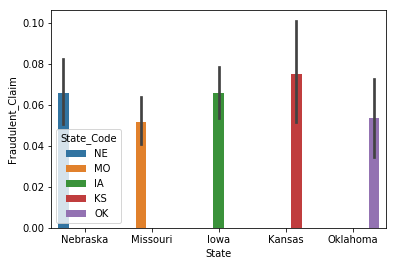

In [286]:
sns.barplot(x="State", y="Fraudulent_Claim", hue="State_Code", data=Test);

# Only states with Fraud: Kansas, Iowa, Okhlahoma, Missuri, Nebraska

* Here we can assume most tend to be single.

Intercept                    1.817575e-08
Marital_Status[T.Married]    6.902041e-01
Marital_Status[T.Single]     7.471003e-04
dtype: float64

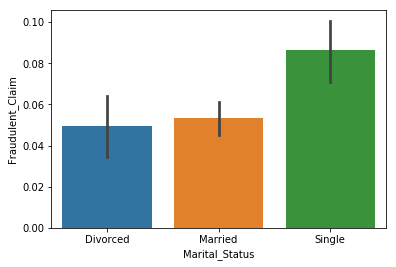

In [287]:
sns.barplot(x="Marital_Status", y="Fraudulent_Claim", data=Test);

lm = smf.ols('Fraudulent_Claim ~ Marital_Status', data=Test).fit()
lm.pvalues

* Here we can assume a vast majority tend to be male

Intercept      1.542035e-07
Gender[T.M]    2.467379e-26
dtype: float64

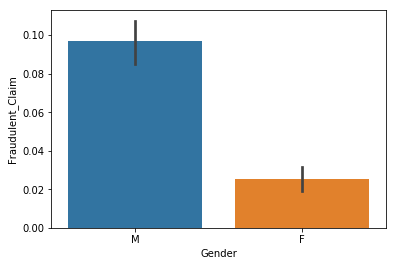

In [288]:
sns.barplot(x="Gender", y="Fraudulent_Claim", data=Test);

lm = smf.ols('Fraudulent_Claim ~ Gender', data=Test).fit()
lm.pvalues

# Male significant

* Now we can test our newly binned Claim_Amount for Fraudulent Claims...and results indicate Minor or Very High Claims tend to be fraud

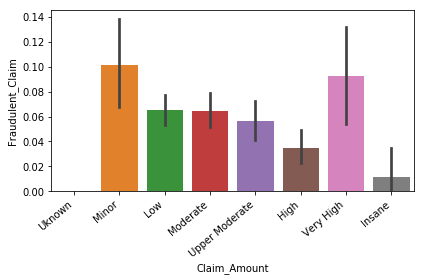

Intercept                         2.738090e-30
Claim_Amount[T.Minor]             2.000008e-04
Claim_Amount[T.Low]               8.954491e-02
Claim_Amount[T.Moderate]          1.429658e-01
Claim_Amount[T.Upper Moderate]    7.285657e-01
Claim_Amount[T.High]              4.279043e-02
Claim_Amount[T.Very High]         9.612545e-03
Claim_Amount[T.Insane]            6.842709e-02
dtype: float64

In [289]:
ax = sns.barplot(x="Claim_Amount", y="Fraudulent_Claim", data=Test);

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

lm = smf.ols('Fraudulent_Claim ~ Claim_Amount', data=Test).fit()
lm.pvalues

# Minor, Very High significant

### Claim and Vehicle Data Tested by State
* Below are a few graphs we ran against the variable State to see the breakdown of Claim/Vehicle data within each of the 5 states. To our surprise, there are some definite variances to consider. 

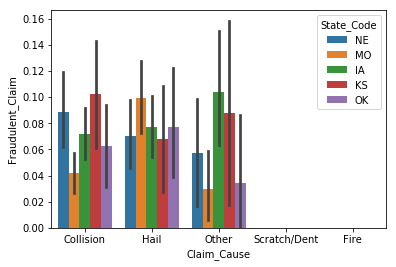

In [290]:
sns.barplot(x="Claim_Cause", y="Fraudulent_Claim", hue="State_Code", data=Test);

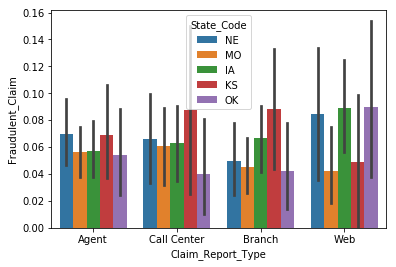

In [291]:
sns.barplot(x="Claim_Report_Type", y="Fraudulent_Claim", hue="State_Code", data=Test);

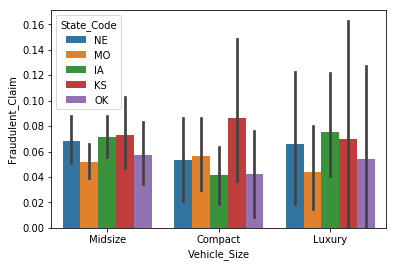

In [292]:
sns.barplot(x="Vehicle_Size", y="Fraudulent_Claim", hue="State_Code", data=Test);

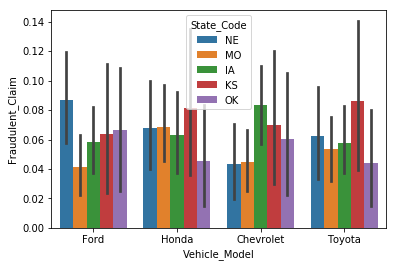

In [293]:
sns.barplot(x="Vehicle_Model", y="Fraudulent_Claim", hue="State_Code", data=Test);

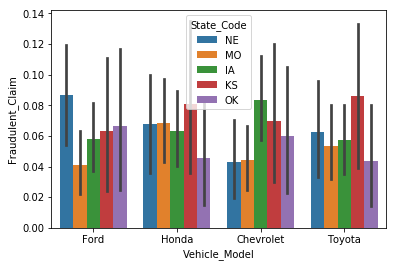

In [294]:
sns.barplot(x="Vehicle_Model", y="Fraudulent_Claim", hue="State_Code", data=Test);

# FAILURE to get Altair Library to work... 
* We were going to look at stacked area charts for Claim Amount and other vehicle/claim-related nominal variables.

In [295]:
'''import altair as alt
alt.schema.SCHEMA_VERSION
from vega_datasets import data

source = data.iowa_electricity()

alt.Chart(source).mark_area().encode(
    x="Claim_Amount:T",
    y=alt.Y("Fraudulent_Claim:Q", stack="normalize"),
    color="State:N"
)
'''

'import altair as alt\nalt.schema.SCHEMA_VERSION\nfrom vega_datasets import data\n\nsource = data.iowa_electricity()\n\nalt.Chart(source).mark_area().encode(\n    x="Claim_Amount:T",\n    y=alt.Y("Fraudulent_Claim:Q", stack="normalize"),\n    color="State:N"\n)\n'

# Preparing to Predict -- Encoding Part II
* We encoded earlier, but now we will encode again with all variables to help our predictive algorithims run smoother. 

In [296]:
from sklearn import preprocessing 
def encode_features(df_Test): 
    features = ['Fraudulent_Claim', 'State_Code', 'Claim_Amount', 'State', 'Marital_Status', 'Gender', 'Claim_Cause', 'Claim_Report_Type', 'Vehicle_Class', 'Vehicle_Size', 'Vehicle_Model']
    for feature in features: 
        le = preprocessing.LabelEncoder() 
        le = le.fit(df_Test[feature]) 
        df_Test[feature] = le.transform(df_Test[feature]) 
    return df_Test

In [297]:
Test = encode_features(Test) 
Score = encode_features(Score) 
Test.head()

,State_Code,State,Claim_Amount,Gender,Income,Marital_Status,Monthly_Premium,Annual_Premium,Months_Since_Last_Claim,Months_Since_Policy_Inception,Claim_Cause,Claim_Report_Type,Vehicle_Class,Vehicle_Size,Vehicle_Model,Fraudulent_Claim,Claimant__Number
0,3,3,6,1,14072,0,57,684,13,3,0,0,0,2,1,1,1023
1,3,3,4,0,0,1,97,1164,18,45,0,2,0,2,2,1,1231
2,2,2,4,1,25134,1,64,768,3,0,2,2,0,0,2,1,1310
3,0,0,2,1,37057,1,97,1164,5,48,0,0,0,0,2,1,1311
4,0,0,3,1,29735,2,137,1644,3,92,0,0,0,2,0,1,1364


# Split Training and Testing Datasets
* The X set will contain Fraudulent and Claiment # while the Y set simply contains Fraudulent. X_all represents all features minus the value we wish to predict and y_all represents the only value we wish to predict.

* With num_test we are training 80% of the data and testing it against the other 20%. 

In [298]:
from sklearn.model_selection import train_test_split 

X_all = Test.drop(['Fraudulent_Claim', 'Claimant__Number'], axis=1) 
y_all = Test['Fraudulent_Claim'] 

num_test = 0.20 

X_train, X_test, y_train, y_test = train_test_split(X_all, y_all, 
    test_size=num_test, random_state=23)

### Decision Tree 

In [299]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Choose the type of classifier. 
clf = DecisionTreeClassifier(criterion='entropy') 

# Fit the algorithm to the data. 
clf.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [300]:
predictions = clf.predict(X_test)
print(accuracy_score(y_test, predictions))

0.8751248751248751


In [301]:
fi = clf.feature_importances_
col = X_train.columns
feat_imp = pd.DataFrame(fi, columns=['Importance'],index=col).sort_values(by='Importance', ascending=False)
print(feat_imp)

                               Importance
Income                           0.159359
Months_Since_Policy_Inception    0.133284
Months_Since_Last_Claim          0.094188
Annual_Premium                   0.088300
Claim_Amount                     0.079533
Vehicle_Class                    0.076693
Monthly_Premium                  0.076379
Claim_Cause                      0.068480
Gender                           0.047979
Vehicle_Size                     0.037529
State                            0.029271
Marital_Status                   0.028738
State_Code                       0.028614
Vehicle_Model                    0.026088
Claim_Report_Type                0.025563


### Logistic Regression

In [302]:
from sklearn.linear_model import LogisticRegression
# http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# Choose the type of classifier. 
clf1 = LogisticRegression() 

# Fit the algorithm to the data. 
clf1.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [303]:
predictions = clf1.predict(X_test)
print(accuracy_score(y_test, predictions))

0.942057942057942


### RandomForest

In [304]:
from sklearn.ensemble import RandomForestClassifier
# http://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#
clf2 = RandomForestClassifier(bootstrap=False, n_estimators=100, max_features=1, max_depth=10)

# Fit the algorithm to the data. 
clf2.fit(X_train, y_train)

RandomForestClassifier(bootstrap=False, class_weight=None, criterion='gini',
            max_depth=10, max_features=1, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [305]:
predictions = clf2.predict(X_test)
print(accuracy_score(y_test, predictions))

0.942057942057942


# Testing the Dataset against the Scoring Sheet

In [306]:
X_all = Score.drop(['Fraudulent_Claim', 'Claimant__Number'], axis=1) 
y_all = Score['Fraudulent_Claim'] 

In [307]:
predictions = clf2.predict(X_all)
print(accuracy_score(y_all, predictions))

0.8557884231536926


# Conclusion
* Logistic Regression and RandomForest both predicted a ~94% accuracy rating...although we are not entirely sure why the score is so high. For the Scored dataset, we only reached ~85% accuracy rating which isn't too bad, however, our model may be overfitted due to how close the datasets are in integrity. 

* Claim_Amount is an important indicator as over 50% of the claims were made in the low-moderate bracket range
* Demographics such as gender and marital status are important as well for identifying the person of interest...other variables such as age and household size (children) would've helped. 
* Being able to determine location (suburban vs urban) would've helped, but we ended up dropping that column